# Обработка количественных данных: доход

In [ ]:
import pandas as pd
dataset = pd.read_csv('hh_final.csv')
dataset

,Направление,Вакансия,Доход,Ключевые навыки
0,Культурология,Заведующий музеем,90000,Навыки не указаны
1,Культурология,Научный сотрудник музея,25000,Навыки не указаны
2,Культурология,Экскурсовод,35000,Навыки не указаны
3,Культурология,Главный хранитель - заместитель заведующего (П...,30000,Навыки не указаны
4,Культурология,Методист по научно-просветительской деятельнос...,40000,Навыки не указаны
...,...,...,...,...
1396,Религиоведение,Доцент Кафедры религиоведения,50000,"['Высшее образование', 'Работа в условиях мног..."
1397,Религиоведение,Заведующий кафедрой религиоведения,79000,Навыки не указаны
1398,Религиоведение,Старший преподаватель Кафедры религиоведения,37000,"['Написание научных статей', 'Преподаватель', ..."
1399,Религиоведение,Профессор кафедры религиоведения,50000,Навыки не указаны


## Очистка нулей и лишних строк

In [ ]:
dataset_1 = dataset[dataset['Направление'] != 'Направление']
dataset_1['Доход'] = pd.to_numeric(dataset_1['Доход'])

In [ ]:
dataset_clean = dataset_1[dataset_1['Доход'] != 0] # избавляемся от нулевых строковых значений
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1400
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Направление      1395 non-null   object
 1   Вакансия         1395 non-null   object
 2   Доход            1395 non-null   int64 
 3   Ключевые навыки  1395 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.5+ KB


In [ ]:
# Cбрасываем старые индексы
dataset_clean.reset_index(drop= True , inplace= True )
dataset_clean['Доход'][140:144]

140    70000
141    35000
142    45000
143    80000
Name: Доход, dtype: int64

## Анализ дохода

In [ ]:
dataset_clean['Направление'].value_counts()

Документооборот            120
История                    120
Международные отношения    120
Юриспруденция              120
Физическая культура        120
Редактирование             119
Реклама                    119
Журналистика               118
Психология                 118
Лингвистика                116
Филология                  106
Философское образование     39
Политология                 20
Регионоведение              18
Культурология               17
Религиоведение               5
Name: Направление, dtype: int64

In [ ]:
# Какая зп максимальная и минимальная?

salary = dataset_clean['Доход']
max_value = salary.max()
min_value = salary.min()

print('Максимальный размер зп: ', max_value, 'Минимальный размер зп: ', min_value)

# Какая средняя зп - может быть искажена выбросами
mean_value = salary.mean()
print('Средняя зп до обработки выбросов (ср.ариф.): ', mean_value)

# Альтернативный метод - медиана
median_value = salary.median()
print('Средняя зп до обработки выбросов (медиана): ', median_value)

Максимальный размер зп:  500000 Минимальный размер зп:  5000
Средняя зп до обработки выбросов (ср.ариф.):  57761.62652329749
Средняя зп до обработки выбросов (медиана):  50000.0


### Проверка выбросов - доход

<function matplotlib.pyplot.show(close=None, block=None)>

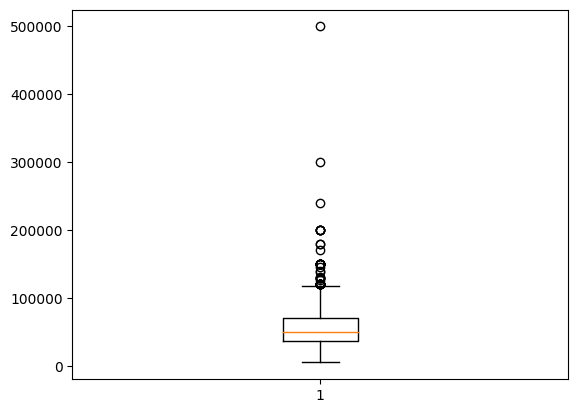

In [ ]:
import matplotlib.pyplot as plt
salary = dataset_clean['Доход']
plt.boxplot(salary)         # Применяем команду
plt.show                    # Выводим, что получилось

# Анализ категориальных данных: вакансии (переедет в другой код, не смотреть)

## Конкретная выборка вакансий отдельной области

### Выявление топ 10 профессий на рынке

In [ ]:
import pandas as pd
dataset = pd.read_csv('marketing.csv')
dataset = dataset[dataset['Доход'] != 0 ]
dataset

### Объединение профессий

In [ ]:
import re
list_of_vacancy = []
for vacancies in dataset['Вакансия']:
  #print(vacancies)
  vacancy = re.sub(r'\([^)]*?\)', '', vacancies)
  #print(vacancy)
  list_of_vacancy.append(vacancy)

#list_of_skills = list_of_skills.split('')
dataset['Вакансии_clean'] = list_of_vacancy
print(dataset['Вакансии_clean'])

0      Специалист по медиапланированию / менеджер по ...
1                                   Менеджер по рекламе 
2                            Ассистент отдела маркетинга
3                                             Маркетолог
4         Менеджер по продажам рекламных площадей в СМИ 
                             ...                        
115                                  Менеджер по рекламе
116                                  Менеджер по рекламе
117                             Менеджер по PR и рекламе
118    Media buyer  / Специалист по планированию и ра...
119                                  Менеджер по рекламе
Name: Вакансии_clean, Length: 119, dtype: object


In [ ]:
dataset.head()

,Направление,Вакансия,Доход,Ключевые навыки,Вакансии_clean
0,Реклама,Специалист по медиапланированию / менеджер по ...,75000,"['Пользователь ПК', 'Баннерная реклама', 'Меди...",Специалист по медиапланированию / менеджер по ...
1,Реклама,Менеджер по рекламе (наружная реклама),80000,Навыки не указаны,Менеджер по рекламе
2,Реклама,Ассистент отдела маркетинга,40000,"['Написание текстов', 'Деловое общение']",Ассистент отдела маркетинга
3,Реклама,Маркетолог,80000,"['Яндекс.Метрика', 'Яндекс.Директ', 'Контекстн...",Маркетолог
4,Реклама,Менеджер по продажам рекламных площадей в СМИ ...,50000,"['Навыки переговоров', 'Деловая коммуникация',...",Менеджер по продажам рекламных площадей в СМИ


### Визуализация профессий

In [ ]:
list_of_vacancies = dataset['Вакансии_clean'].value_counts()[:10]
print(list_of_vacancies)

Менеджер по рекламе                          15
Менеджер по маркетингу и рекламе             14
Менеджер по рекламе и маркетингу              7
Маркетолог                                    6
Руководитель отдела маркетинга и рекламы      6
Специалист по рекламе                         5
Менеджер по рекламе                           4
Руководитель отдела маркетинга и рекламы      3
Специалист по рекламе и PR                    3
Менеджер по маркетингу, рекламе и PR          3
Name: Вакансии_clean, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

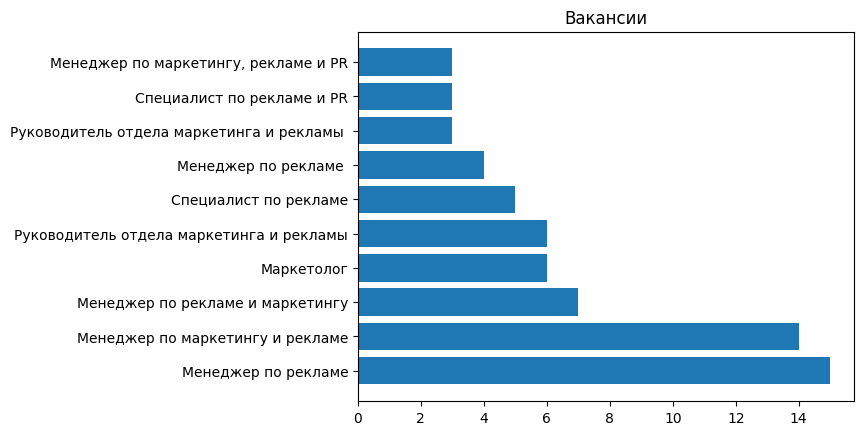

In [ ]:
import matplotlib.pyplot as plt
plt.barh(list_of_vacancies.index, list_of_vacancies.values)       # Горизонтальный график barh
plt.title('Вакансии')
plt.show

### Конкретная выборка вакансий отдельной области

In [ ]:
import pandas as pd
HH_dataset = pd.read_csv('hh_final.csv')
HH_dataset = HH_dataset[HH_dataset['Доход'] != 0 ]
HH_dataset

,Направление,Вакансия,Доход,Ключевые навыки
0,Культурология,Заведующий музеем,90000,Навыки не указаны
1,Культурология,Научный сотрудник музея,25000,Навыки не указаны
2,Культурология,Экскурсовод,35000,Навыки не указаны
3,Культурология,Главный хранитель - заместитель заведующего (П...,30000,Навыки не указаны
4,Культурология,Методист по научно-просветительской деятельнос...,40000,Навыки не указаны
...,...,...,...,...
1396,Религиоведение,Доцент Кафедры религиоведения,50000,"['Высшее образование', 'Работа в условиях мног..."
1397,Религиоведение,Заведующий кафедрой религиоведения,79000,Навыки не указаны
1398,Религиоведение,Старший преподаватель Кафедры религиоведения,37000,"['Написание научных статей', 'Преподаватель', ..."
1399,Религиоведение,Профессор кафедры религиоведения,50000,Навыки не указаны


# Обработка выборки по направлениям

## Проверка на нормальность расспределения

In [ ]:
field = dataset_clean['Направление']
field.value_counts()

Документооборот            120
История                    120
Международные отношения    120
Юриспруденция              120
Физическая культура        120
Редактирование             119
Реклама                    119
Журналистика               118
Психология                 118
Лингвистика                116
Филология                  106
Философское образование     39
Политология                 20
Регионоведение              18
Культурология               17
Религиоведение               5
Name: Направление, dtype: int64

In [ ]:
from scipy.stats import shapiro
field_100_counts = dataset_clean['Направление'].value_counts()
list_norm = field_100_counts.values
print(list_norm)
shapiro(list_norm)

# Если p-значение ниже определенного уровня значимости,
# то у нас не достаточно доказательств, чтобы сказать,
# что данные выборки получены из нормального распределения.


[120 120 120 120 120 119 119 118 118 116 106  39  20  18  17   5]


ShapiroResult(statistic=0.6687167882919312, pvalue=7.78818066464737e-05)

Согласно тесту Шапиро-Уивилка, распределение **является ненормальным**, соответвственно, для выявления среднего значения количественных показателей мы воспользуемся **медиану**:

---



---



In [ ]:
mean_value = dataset_clean['Направление'].value_counts().mean()
median_value = dataset_clean['Направление'].value_counts().median()
print(f'Медиана: {median_value}, среднее ариф.:{mean_value}')

Медиана: 118.0, среднее ариф.:87.1875


По результатам медианы, мы уберем направления из общей выборки, т.к. она отклоняется от необходимого значения больше, чем на 10 процентов


In [ ]:
# Исключаем из выборки направления, число вакансий в которых намного меньшие заданного объема выборки (106+)

dataset_100 = dataset_clean[dataset_clean['Направление'] != "Философское образование"]
dataset_100 = dataset_100[dataset_100['Направление'] != "Политология"]
dataset_100 = dataset_100[dataset_100['Направление'] != "Регионоведение"]
dataset_100 = dataset_100[dataset_100['Направление'] != "Культурология"]
dataset_100 = dataset_100[dataset_100['Направление'] != "Религиоведение"]

In [ ]:
# Cбрасываем старые индексы
dataset_100.reset_index(drop= True , inplace= True )
dataset_100

,Направление,Вакансия,Доход,Ключевые навыки
0,Документооборот,Специалист по документообороту,45000,"['Грамотность', 'MS Outlook', '1С: Предприятие..."
1,Документооборот,Бухгалтер на первичную документацию,60000,"['1С: Документооборот', 'Знание 1С', 'Высшее о..."
2,Документооборот,Специалист по документообороту,99000,"['Электронный документооборот', 'Делопроизводс..."
3,Документооборот,Менеджер по документообороту,54500,"['Пользователь ПК', 'Офисная техника', 'Докуме..."
4,Документооборот,Специалист по документообороту,64000,"['Первичная бухгалтерская документация', 'Доку..."
...,...,...,...,...
1291,Психология,Психолог 1 категории Центра обработки экстренн...,19096,"['Психология', 'Работа с людьми', 'Пользовател..."
1292,Психология,Педагог-психолог,30000,"['Обучение и развитие', 'Организаторские навык..."
1293,Психология,Психолог Росгвардии,37000,Навыки не указаны
1294,Психология,Воспитатель детей младшей группы,40000,"['аккуратность', 'гибкость', 'Коммуникабельнос..."


In [ ]:
dataset_100['Направление'].value_counts()

Документооборот            120
История                    120
Международные отношения    120
Юриспруденция              120
Физическая культура        120
Редактирование             119
Реклама                    119
Журналистика               118
Психология                 118
Лингвистика                116
Филология                  106
Name: Направление, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

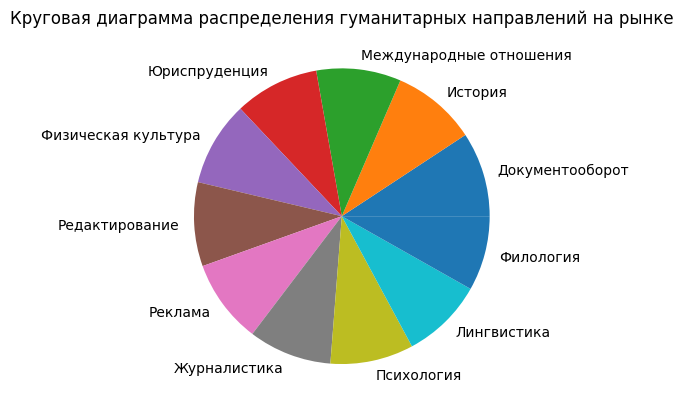

In [ ]:
# Построем круговую диаграмму по направлениям
import matplotlib.pyplot as plt
field_counts = dataset_100['Направление'].value_counts()
plt.pie(field_counts.values, labels = field_counts.index)    # Первый аргумент - значения, второй - названия
plt.title('Представленные на рынке гуманитарные направления')   # Добавлем название графика
plt.show

In [ ]:
import csv
dataset_100.to_csv(r'dataset_100.csv', index= False )